In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from math import sqrt 
from math import ceil
from math import log

import numpy as np
from numpy.random import multivariate_normal, randn, uniform

from scipy.linalg import toeplitz
from scipy.linalg import norm
from scipy.linalg import svdvals
from scipy.linalg import qr
from scipy.optimize import fmin_l_bfgs_b

from algoritms.gradient_descent import gd
from problems.regression import RegPb
from utils.utils import visualize

# Exercice 1

### Question 1.a.

### Question 1.b.

In [2]:
np.random.seed(0)
n = 100
X = np.random.normal(0, 1, n).reshape(n, 1)
y = np.random.normal(0, 1, n).reshape(n, 1)
w0 = np.random.random(1).reshape(1, 1)

pblinreg = RegPb(X=X, y=y, lbda=0, loss="l2")

       0 | 5.31e-01 | 9.81e-01
       1 | 5.31e-01 | 9.81e-01
       2 | 5.31e-01 | 9.81e-01
       3 | 5.31e-01 | 9.81e-01
       4 | 5.31e-01 | 9.81e-01
       5 | 5.31e-01 | 9.81e-01
       6 | 5.31e-01 | 9.81e-01
       7 | 5.31e-01 | 9.81e-01
       8 | 5.31e-01 | 9.81e-01
       9 | 5.31e-01 | 9.81e-01


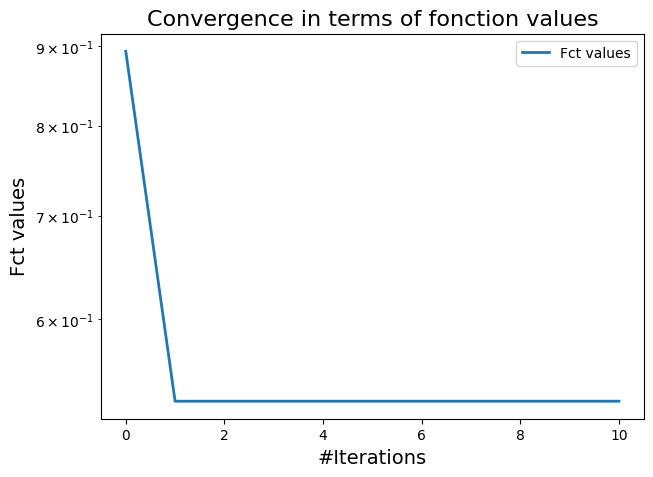

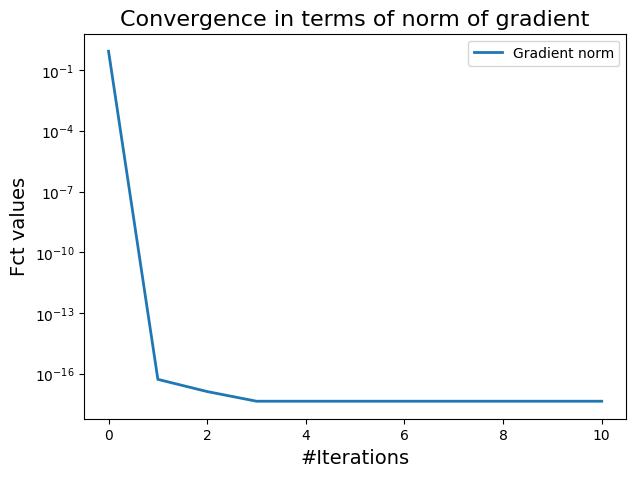

In [7]:
_, fct_val, norm_grad_val = gd(
    w0, pblinreg, stepchoice=0, stepbar=1, n_iter=10, verbose=True
)

visualize(data={"Fct values": fct_val}, title="fonction values")
visualize(data={"Gradient norm": norm_grad_val}, title="norm of gradient")

       0 | 8.93e-01 | 9.81e-01
       1 | 5.31e-01 | 9.81e-01
       2 | 5.31e-01 | 9.81e-01
       3 | 5.31e-01 | 9.81e-01
       4 | 5.31e-01 | 9.81e-01
       5 | 5.31e-01 | 9.81e-01
       6 | 5.31e-01 | 9.81e-01
       7 | 5.31e-01 | 9.81e-01
       8 | 5.31e-01 | 9.81e-01
       9 | 5.31e-01 | 9.81e-01


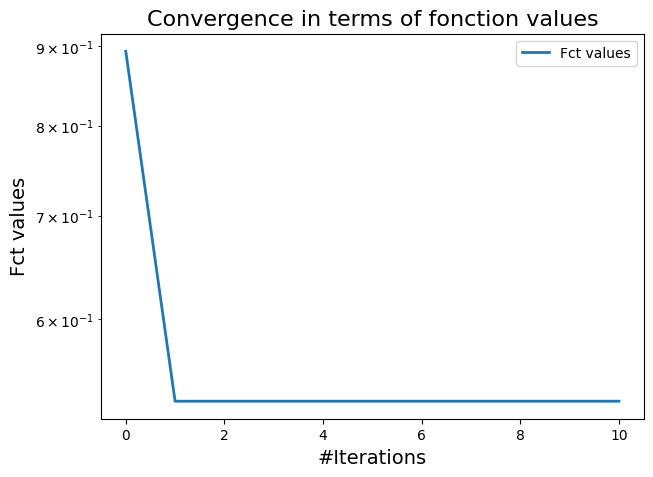

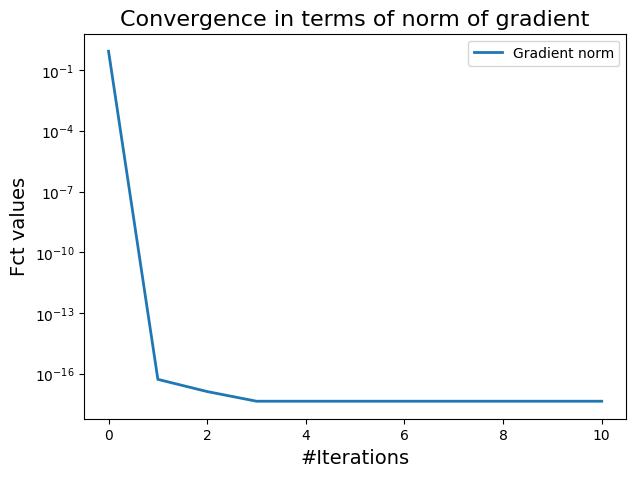

In [5]:
_, fct_val, norm_grad_val = gd(
    w0, pblinreg, stepchoice=0, stepbar=1, n_iter=10, verbose=True
)

visualize(data={"Fct values": fct_val}, title="fonction values")
visualize(data={"Gradient norm": norm_grad_val}, title="norm of gradient")

### Question 2.a.

### Question 2.b.

In [2]:
np.random.seed(0)
n = 10
X = np.random.normal(0, 1, n).reshape(1, n)
y = np.random.normal(0, 1, n).reshape(1, n)
W0 = np.random.normal(0, 1, (n, n))
pblinreg = RegPb(X=X, y=y, lbda=2, loss="l2")

       0 | 2.19e+02 | 1.25e-01
       1 | 2.01e+02 | 6.25e-02
       2 | 4.34e+01 | 5.00e-01
       3 | 2.02e+01 | 6.25e-02
       4 | 4.15e-01 | 6.25e-02
       5 | 3.66e-01 | 6.25e-02
       6 | 3.65e-01 | 6.25e-02
       7 | 3.65e-01 | 6.25e-02
       8 | 3.65e-01 | 6.25e-02
       9 | 3.65e-01 | 6.25e-02
      10 | 3.65e-01 | 1.56e-02
      11 | 3.65e-01 | 4.88e-04
      12 | 3.65e-01 | 3.91e-03
      13 | 3.65e-01 | 5.82e-11
      14 | 3.65e-01 | 5.82e-11
      15 | 3.65e-01 | 5.82e-11
      16 | 3.65e-01 | 5.82e-11
      17 | 3.65e-01 | 5.82e-11
      18 | 3.65e-01 | 5.82e-11
      19 | 3.65e-01 | 5.82e-11


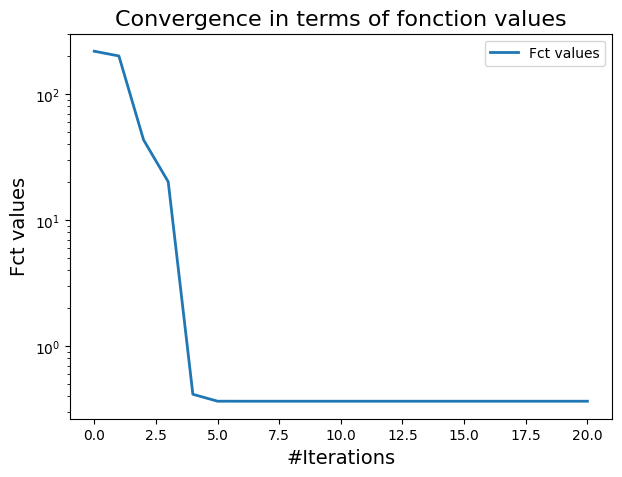

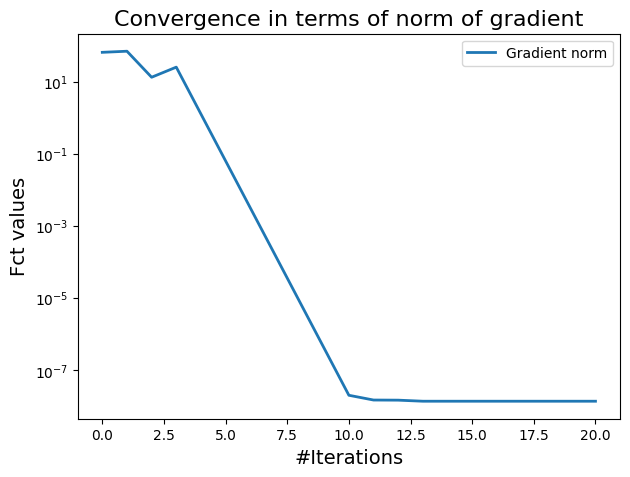

In [44]:
_, overparam_fct_val, overparam_norm_grad_val = gd(
    W0, pblinreg, stepchoice=-1, stepbar=0.5, n_iter=20, verbose=True
)

visualize(data={"Fct values": overparam_fct_val}, title="fonction values")
visualize(data={"Gradient norm": overparam_norm_grad_val}, title="norm of gradient")

       0 | 6.57e+03 | 5.00e-01
       1 | 7.94e+03 | 1.25e-01
       2 | 3.57e+01 | 5.56e-02
       3 | 8.34e+00 | 3.12e-02
       4 | 3.88e+00 | 2.00e-02
       5 | 2.43e+00 | 1.39e-02
       6 | 1.78e+00 | 1.02e-02
       7 | 1.44e+00 | 7.81e-03
       8 | 1.23e+00 | 6.17e-03
       9 | 1.09e+00 | 5.00e-03
      10 | 9.91e-01 | 4.13e-03
      11 | 9.20e-01 | 3.47e-03
      12 | 8.66e-01 | 2.96e-03
      13 | 8.24e-01 | 2.55e-03
      14 | 7.91e-01 | 2.22e-03
      15 | 7.63e-01 | 1.95e-03
      16 | 7.40e-01 | 1.73e-03
      17 | 7.21e-01 | 1.54e-03
      18 | 7.05e-01 | 1.39e-03
      19 | 6.91e-01 | 1.25e-03


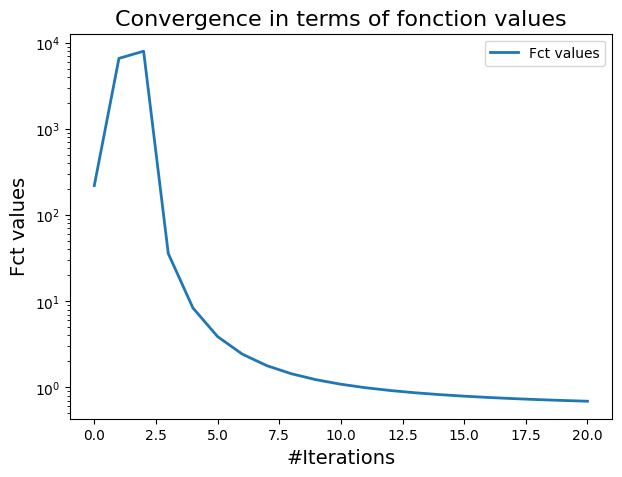

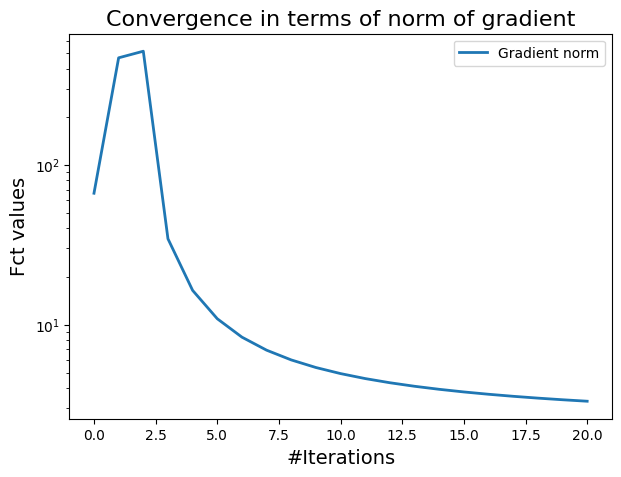

In [13]:
_, overparam_fct_val, overparam_norm_grad_val = gd(
    W0, pblinreg, stepchoice=2, init_step=0.5, n_iter=20, verbose=True
)

visualize(data={"Fct values": overparam_fct_val}, title="fonction values")
visualize(data={"Gradient norm": overparam_norm_grad_val}, title="norm of gradient")

# Exercice 2

## Question 3.a.

In [9]:
np.random.seed(0)
n1 = 10
n2 = 10
x = np.random.normal(0, 1, (n1, 1))
z = np.random.normal(0, 1, (n2, 1))
x.dot(z.T)
X = x.dot(z)

# W0 = np.random.normal(0, 1, (n, n)).reshape(n, n)

pblinreg = RegPb(X=X, y=y, lbda=2, loss="l2")

In [48]:
n1 = 10
n2 = 10
x = np.random.normal(0, 1, (n1, 1))
z = np.random.normal(0, 1, (n2, 1))
x.dot(z.T)

array([[ 0.75282857, -0.32723909, -0.36313024, -0.04325922, -0.29152685,
         0.49503447, -0.47451294, -0.5041882 , -0.19237449, -0.21883133],
       [ 0.28556882, -0.12413089, -0.1377454 , -0.01640943, -0.11058425,
         0.18778035, -0.17999596, -0.19125261, -0.072973  , -0.08300881],
       [ 1.08802649, -0.47294272, -0.52481445, -0.06252045, -0.42132957,
         0.71544923, -0.68579046, -0.72867867, -0.27802949, -0.31626626],
       [ 4.08314375, -1.77485856, -1.96952269, -0.23462662, -1.58116481,
         2.68493651, -2.57363313, -2.73458392, -1.04338855, -1.18688343],
       [ 1.61821705, -0.70340565, -0.78055425, -0.09298639, -0.62664163,
         1.06408452, -1.01997316, -1.0837606 , -0.41351205, -0.47038143],
       [-1.56397732,  0.67982875,  0.75439147,  0.08986965,  0.60563773,
        -1.02841831,  0.98578548,  1.04743489,  0.39965187,  0.45461509],
       [ 1.91383173, -0.83190327, -0.92314531, -0.10997307, -0.74111605,
         1.25847068, -1.20630108, -1.28174117